In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

In [2]:
import tensorflow_decision_forests as tfdf

2025-07-23 17:16:17.568105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-23 17:16:17.613316: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-23 17:16:17.614322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-23 17:16:18.654979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

In [4]:
from category_encoders import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score, confusion_matrix
import matplotlib.pyplot as plt




In [5]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

In [6]:
df = pd.read_csv("/home/fernando-dantas/ccpp/kaggle/spaceship-titanic/train.csv")

In [79]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [80]:
df1 = df.copy()

In [81]:
df1[["c1", "c2", "c3"]] = df1["Cabin"].str.split("/", n=2 , expand=True)

In [82]:
df1["c1"].value_counts().sort_index(ascending =True)

c1
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: count, dtype: int64

In [83]:
df1["c2"].value_counts().sort_index(ascending =True)

c2
0       18
1       15
10      12
100     12
1000     6
        ..
995      3
996      1
997      2
998      4
999      6
Name: count, Length: 1817, dtype: int64

In [84]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,c1,c2,c3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [85]:
df1.groupby("c1")[["FoodCourt", "RoomService","ShoppingMall","VRDeck","Spa"]].mean()

,FoodCourt,RoomService,ShoppingMall,VRDeck,Spa
c1,,,,,
A,1553.677165,135.689243,113.156627,942.828685,693.250000
B,1259.575718,85.577023,153.011858,753.178618,730.408136
C,1845.428177,180.676630,175.570645,1081.377384,926.468493
D,592.744136,675.565310,312.004274,288.244111,474.734914
E,267.334107,312.398837,230.759022,241.185400,271.009335
F,145.798461,308.930479,239.421726,146.070459,165.094070
G,79.696051,73.154862,71.115849,76.333467,89.741524
T,1397.400000,427.200000,0.500000,883.000000,2008.400000


In [86]:
df1[["Id1", "Id2"]] = df1["PassengerId"].str.split("_", n=1, expand=True)

In [87]:
df1["Id2"].value_counts().sort_values(ascending=True)

Id2
08      13
07      46
06      75
05     128
04     231
03     571
02    1412
01    6217
Name: count, dtype: int64

In [88]:
df1.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,c1,c2,c3,Id1,Id2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01


## drop columns c2, Id1


In [89]:
df1.groupby("Id2")[["FoodCourt", "RoomService","ShoppingMall","VRDeck","Spa"]].mean()

,FoodCourt,RoomService,ShoppingMall,VRDeck,Spa
Id2,,,,,
01,422.020217,227.129420,189.550963,288.201118,287.763158
02,564.539074,251.868402,150.936911,376.434249,394.909942
03,471.103757,191.725979,110.596745,278.079929,321.008929
04,642.035088,167.423581,107.044643,352.383929,368.440529
05,777.598425,102.428571,95.910569,485.951220,433.443548
06,474.148649,217.472973,90.662162,186.638889,397.698630
07,144.000000,180.295455,205.391304,175.511111,43.644444
08,54.461538,0.846154,131.923077,204.076923,147.076923


In [90]:
dfpoor = df1[df1[["FoodCourt", "RoomService","ShoppingMall","VRDeck","Spa"]].eq(0).all(axis=1)]


In [91]:
dfpoor.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,c1,c2,c3,Id1,Id2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P,0008,01
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,F,5,P,0016,01
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,G,0,P,0017,01
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,E,0,S,0020,01


In [92]:
dfpoor["Transported"].value_counts(normalize=True)

Transported
True     0.7838
False    0.2162
Name: proportion, dtype: float64

In [93]:
df1["Transported"].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [94]:
novinho = df1[df1["Age"]<=5]
novinho["Transported"].value_counts(normalize=True)

Transported
True     0.757515
False    0.242485
Name: proportion, dtype: float64

In [95]:
novinho.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,c1,c2,c3,Id1,Id2
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,G,0,P,0017,01
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,E,0,S,0020,01
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,E,0,S,0020,05
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True,F,9,P,0031,02
44,0044_02,Earth,True,G/3/P,55 Cancri e,4.0,False,0.0,0.0,0.0,0.0,0.0,Kayne Coopelandez,True,G,3,P,0044,02


In [96]:
df1 ["Novos"]= df1["Age"]<=5

In [97]:
df1["Novos"]

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: Novos, Length: 8693, dtype: bool

In [98]:
df1["Novos"] = df1["Novos"].map({True:1, False:0})

In [99]:
df1["Novos"]

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    0
8690    0
8691    0
8692    0
Name: Novos, Length: 8693, dtype: int64

In [100]:
df1["Poor"] = df1["RoomService"]+df1["VRDeck"]+df1["Spa"]+df1["ShoppingMall"]+df1["FoodCourt"] == 0


In [101]:
df1["Poor"] =  df1["Poor"].map({True:1, False:0})

In [102]:
df1["Poor"].value_counts(normalize=True)

Poor
0    0.626481
1    0.373519
Name: proportion, dtype: float64

In [103]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,c1,c2,c3,Id1,Id2,Novos,Poor
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,0,P,0001,01,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,0,S,0002,01,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,A,0,S,0003,01,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,A,0,S,0003,02,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,F,1,S,0004,01,0,0


In [104]:
df1["Id1"].value_counts()

Id1
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: count, Length: 6217, dtype: int64

In [105]:
df1.drop(columns = ["c2", "Id1", "Cabin","PassengerId"], inplace=True)

In [106]:
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,c1,c3,Id2,Novos,Poor
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,01,0,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,01,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,01,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,02,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,01,0,0


In [107]:
df1["Id2"].dtype.name

'object'

In [108]:
df1["RoomService"].isna().sum()

181

In [109]:
df1["Id2"].value_counts()

Id2
01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: count, dtype: int64

In [110]:
df1["Transported2"] = df1["Transported"]


In [111]:
df1.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,c1,c3,Id2,Novos,Poor,Transported2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,01,0,1,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,01,0,0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,01,0,0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,02,0,0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,01,0,0,True
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,P,01,0,0,True
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,S,01,0,0,True
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,S,02,0,0,True
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,S,01,0,0,True
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,P,01,0,1,True


In [112]:
df1.drop(columns=["Transported"], inplace =True)

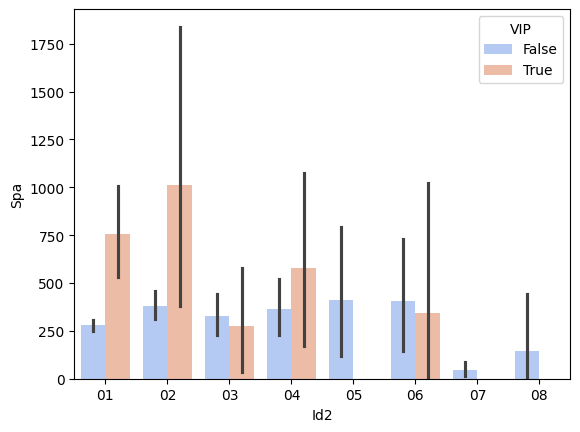

In [113]:
_= sns.barplot(data=df1, x="Id2", y="Spa", hue = "VIP", palette="coolwarm", width=0.8)

In [114]:
df1["Id2"].value_counts()

Id2
01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: count, dtype: int64

In [115]:
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,c1,c3,Id2,Novos,Poor,Transported2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,P,01,0,1,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,S,01,0,0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,S,01,0,0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,S,02,0,0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,S,01,0,0,True


In [116]:
df2 = df1.copy()
df3 = df1.copy()
df4 = df1.copy()
df5 = df1.copy()

In [117]:
X = df1.iloc[:,:len(df1.columns)-1]
y = df1["Transported2"]

In [118]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
train, test = train_test_split(df1, test_size=0.25, random_state=0)


In [119]:
train2 = train.copy()

In [120]:
train = train.drop(columns=["Name"])
test = test.drop(columns=["Name"])

In [121]:
missing_cat = [x for x in train.columns if train[x].dtype =="O" and train[x].isna().sum()>0]

missing_num = [x for x in train.columns if train[x].dtype !="O" and train[x].isna().sum()>0]


In [122]:
cat = np.array([coluna for coluna in train.columns if train[coluna].dtypes.name == "object"])



num  = np.array([coluna for coluna in train.columns if coluna not in cat])

In [123]:
cat_params={
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
}

def store_missing_rows(df, features):
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows

def fill_missing_categorical(train, test, target, features, max_iterations=10):
    
    df=pd.concat([train.drop(columns=target),test.drop(columns=target)], axis="rows")
    df=df.reset_index(drop=True)
    
    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)
    
    for f in features:
        df[f]=df[f].fillna("Missing_"+f)

    for iteration in range(max_iterations): #tqdm
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index #lista de index das rows d dataframe no mising rows
            
            missing_temp = df.loc[rows_miss].copy() #partes do dataframe onde ha missing na feature em questao
            
            non_missing_temp = df.drop(index=rows_miss).copy() # rows que nao tem missing na coluna em questao
            
            missing_temp = missing_temp.drop(columns=[feature]) # dropo a coluna em em questao do data set em q todos
            #os rows sao missing

            other_features = [x for x in features if x != feature]
            
            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])

            y_train = non_missing_temp[[feature]]

            catboost_classifier = CatBoostClassifier(**cat_params)

            catboost_classifier.fit(X_train, y_train, cat_features=other_features, verbose=False) 

            
            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)
            df.loc[rows_miss, feature] = y_pred
            
             
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])
    
    return train,test


In [124]:
train ,test= fill_missing_categorical(train,test,"Transported2",missing_cat,6)

In [125]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,c1,c3,Id2,Novos,Poor,Transported2
3601,Earth,False,55 Cancri e,16.0,False,0.0,0.0,623.0,40.0,209.0,F,S,05,0,0,True
6057,Earth,True,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,G,P,02,1,1,True
2797,Earth,False,TRAPPIST-1e,31.0,False,517.0,1.0,301.0,60.0,4.0,G,S,01,0,0,False
7110,Earth,False,55 Cancri e,14.0,False,653.0,0.0,4.0,0.0,0.0,F,P,01,0,0,False
8579,Europa,True,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,B,P,01,0,1,True


In [126]:
train.shape

(6519, 16)

In [127]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,c1,c3,Id2,Novos,Poor,Transported2
5020,Mars,True,TRAPPIST-1e,37.0,False,0.0,0.0,0.0,0.0,0.0,F,P,01,0,1,True
5967,Earth,True,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,G,S,02,0,1,True
991,Earth,False,PSO J318.5-22,27.0,False,182.0,0.0,0.0,0.0,376.0,F,S,01,0,0,False
2894,Earth,False,55 Cancri e,15.0,False,62.0,57.0,2646.0,1104.0,312.0,G,P,01,0,0,False
2228,Mars,False,TRAPPIST-1e,23.0,False,1773.0,0.0,78.0,0.0,3.0,F,S,01,0,0,False


In [128]:
cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'random_state': 42,
        }
def rmse(y1,y2):
    return(np.sqrt(mean_squared_error(y1,y2)))

def fill_missing_numerical(train,test,target, features, max_iterations=10):
    
    df=pd.concat([train.drop(columns=target),test.drop(columns=target)],axis="rows")
    df=df.reset_index(drop=True)
    
    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)
    
    # Step 2: Initially fill all missing values with "Missing"
    for f in features:
        df[f]=df[f].fillna(df[f].median())
    
    cat_features=[f for f in df.columns if df[f].dtype=="O"]
    dictionary = {feature: [] for feature in features}
    
    for iteration in range(max_iterations):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index
            
            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            y_pred_prev=missing_temp[feature]
            missing_temp = missing_temp.drop(columns=[feature])
            
            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]
            
            catboost_classifier = CatBoostRegressor(**cb_params)
            catboost_classifier.fit(X_train, y_train,cat_features=cat_features, verbose=False)
            
            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)

            df.loc[rows_miss, feature] = y_pred

            error_minimize=rmse(y_pred,y_pred_prev)
            
            dictionary[feature].append(error_minimize)  # Append the error_minimize value


    
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test



In [129]:
train,test = fill_missing_numerical(train,test,"Transported2",missing_num,6)

In [130]:
colss = ["Age","RoomService", "Spa","FoodCourt","ShoppingMall","VRDeck"]

In [135]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,c1,c3,Id2,Novos,Poor,Transported2
5020,Mars,True,TRAPPIST-1e,37.0,False,0.000000,0.0,0.0,0.0,0.0,F,P,01,0,1,True
5967,Earth,True,55 Cancri e,44.0,False,0.000000,0.0,0.0,0.0,0.0,G,S,02,0,1,True
991,Earth,False,PSO J318.5-22,27.0,False,182.000000,0.0,0.0,0.0,376.0,F,S,01,0,0,False
2894,Earth,False,55 Cancri e,15.0,False,62.000000,57.0,2646.0,1104.0,312.0,G,P,01,0,0,False
2228,Mars,False,TRAPPIST-1e,23.0,False,1773.000000,0.0,78.0,0.0,3.0,F,S,01,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Europa,True,55 Cancri e,32.0,False,0.000000,0.0,0.0,0.0,0.0,B,P,01,0,1,True
7891,Earth,False,TRAPPIST-1e,22.0,False,0.000000,0.0,6.0,0.0,733.0,F,S,01,0,0,False
4859,Mars,False,TRAPPIST-1e,29.0,False,523.000000,0.0,21.0,4.0,811.0,E,S,01,0,0,False
3264,Earth,False,TRAPPIST-1e,0.0,False,0.000000,0.0,0.0,0.0,0.0,G,P,04,1,1,False


In [136]:
train[colss] = train[colss].apply(lambda x: x.where(x >= 0, 0))
test[colss] = test[colss].apply(lambda x: x.where(x >= 0, 0))

In [138]:
train["Transported2"] = train["Transported2"].map({True:1, False:0})
test["Transported2"] = test["Transported2"].map({True:1, False:0})

In [139]:
cols_to_conv = ["CryoSleep", "VIP"]

train[cols_to_conv] = train[cols_to_conv].astype(int)

test[cols_to_conv] = test[cols_to_conv].astype(int)

In [141]:
%%time

# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# Define and train the model.
model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)


Use /tmp/tmpa8wtavcx as temporary training directory


CPU times: user 19.7 ms, sys: 4.27 ms, total: 24 ms
Wall time: 37.1 ms


[WARNING 25-07-15 23:42:47.3185 -03 gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 25-07-15 23:42:47.3185 -03 gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 25-07-15 23:42:47.3186 -03 gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [142]:
treino_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="Transported2")


In [ ]:
# treino_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="Transported2")

# # model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
# model = tfdf.keras.RandomForestModel()
# model.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp5rn1jxh1 as temporary training directory


In [143]:
model.fit(x=treino_tf_ds)

Reading training dataset...


2025-07-15 23:42:59.618921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype int64 and shape [6519]
	 [[{{node Placeholder/_6}}]]


Training dataset read in 0:00:00.359508. Found 6519 examples.
Training model...
Model trained in 0:08:48.276737
Compiling model...


[INFO 25-07-15 23:51:48.1969 -03 kernel.cc:1243] Loading model from path /tmp/tmpa8wtavcx/model/ with prefix 9efdfdcfa4454056
[INFO 25-07-15 23:51:48.2478 -03 decision_forest.cc:660] Model loaded with 152 root(s), 12242 node(s), and 15 input feature(s).
[INFO 25-07-15 23:51:48.2478 -03 abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 25-07-15 23:51:48.2478 -03 kernel.cc:1075] Use fast generic engine
2025-07-15 23:51:48.266000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype double and shape [6519]
	 [[{{node Placeholder/_8}}]]


Model compiled.


In [144]:
teste_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label="Transported2")


In [145]:
model.compile(["accuracy"])
tuned_test_accuracy = model.evaluate(teste_tf_ds, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracy:.4f}")

2025-07-15 23:52:23.488360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_15' with dtype int64 and shape [2174]
	 [[{{node Placeholder/_15}}]]


Test accuracy with the TF-DF hyper-parameter tuner: 0.8054


In [160]:
tuning_logs = model.make_inspector().tuning_logs()
tuning_logs.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,growing_strategy,max_num_nodes,sampling_method,subsample,shrinkage,min_examples,use_hessian_gain,num_candidate_attributes_ratio,max_depth
0,-0.786786,37.759704,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,CART,BEST_FIRST_GLOBAL,32.0,RANDOM,1.0,0.1,10,false,0.2,NaN
1,-0.772449,40.611438,False,SPARSE_OBLIQUE,3.0,STANDARD_DEVIATION,CONTINUOUS,CART,LOCAL,NaN,RANDOM,0.8,0.1,7,false,0.9,4.0
2,-0.762760,48.110685,False,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,CONTINUOUS,RANDOM,BEST_FIRST_GLOBAL,256.0,RANDOM,1.0,0.1,20,true,0.5,NaN
3,-0.749922,52.708851,False,SPARSE_OBLIQUE,1.0,NONE,BINARY,CART,BEST_FIRST_GLOBAL,64.0,RANDOM,1.0,0.1,20,false,0.2,NaN
4,-0.758738,55.601682,False,SPARSE_OBLIQUE,3.0,NONE,BINARY,RANDOM,LOCAL,NaN,RANDOM,1.0,0.1,5,false,0.5,8.0


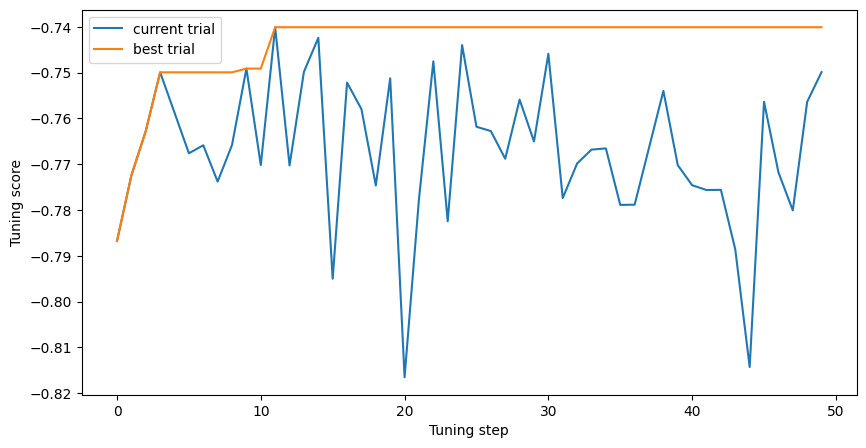

In [161]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()


In [146]:
evaluation = model.evaluate(x=teste_tf_ds,return_dict=True)


3/3 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.8054


In [147]:
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

loss: 0.0000
accuracy: 0.8054


In [68]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6519, accuracy=0.7990489338855653, loss=0.571287677437467, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [69]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [70]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #1), 100.0),
 ("Poor" (1; #7), 78.0),
 ("Spa" (1; #10), 43.0),
 ("RoomService" (1; #8), 40.0),
 ("ShoppingMall" (1; #9), 14.0),
 ("VRDeck" (1; #12), 14.0),
 ("HomePlanet" (4; #4), 4.0),
 ("c1" (4; #14), 4.0),
 ("FoodCourt" (1; #3), 3.0)]

In [71]:
# y_pred = model.predict(test_df)


In [72]:
y_pred2 = np.array(y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
y_binary = (y_pred2 >= 0.45).astype(np.int32)

In [ ]:
precision = precision_score(y_binary, y_test)
accuracy = accuracy_score(y_binary, y_test)
recall = precision_score(y_binary, y_test)
f1 = f1_score(y_binary, y_test)

score = []
score.append(("precision", precision))
score.append(("accuracy",accuracy))
score.append(("recall",recall))
score.append(("f1",f1))

score= pd.DataFrame(score)
score.rename(columns={0: "Metric", 1:"Result"}, inplace=True)

In [ ]:
def trs (y_calc, y_test):
    score = {}

    for i in np.arange (0.35, 0.65, 0.01):
        num = []

        y_ths = (y_calc >= i).astype(np.int32)

        num.append(precision_score(y_ths, y_test))
        num.append(accuracy_score(y_ths, y_test))
        num.append(f1_score(y_ths, y_test))
        num.append(f1_score(y_ths, y_test, average="weighted"))



        score[i] = num
    
    df = pd.DataFrame(score, index=["precision", "accuracy", "f1","f1_wei"])
    
    return df
           
final = trs (y_pred2, y_test)


In [ ]:
final.iloc[:, 1:10]

,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44
precision,0.865998,0.863263,0.857794,0.854148,0.851413,0.846855,0.838651,0.837739,0.833181
accuracy,0.804048,0.806348,0.810028,0.810948,0.811868,0.810948,0.809568,0.811408,0.811868
f1,0.816853,0.818143,0.820044,0.820131,0.820378,0.818863,0.816327,0.817616,0.817166
f1_wei,0.804884,0.807050,0.810520,0.811353,0.812209,0.811233,0.809761,0.811567,0.811975


In [148]:
main  = pd.read_csv("/home/fernando-dantas/ccpp/kaggle/spaceship-titanic/test.csv")

In [149]:
main.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [150]:
submission_id = main.PassengerId


In [151]:
submission_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [152]:
testecsv = pd.read_csv("/home/fernando-dantas/ccpp/kaggle/spaceship-titanic/test.csv")


In [153]:
testecsv.drop(columns=["Name"], inplace=True)

In [154]:
testecsv[["c1", "c2", "c3"]] = testecsv["Cabin"].str.split("/", n=2 , expand=True)


In [156]:
testecsv[["Id1", "Id2"]] = testecsv["PassengerId"].str.split("_", n=1, expand=True)

In [157]:
testecsv ["Novos"]= testecsv["Age"]<=5

In [158]:
testecsv["Novos"] = testecsv["Novos"].map({True:1, False:0})

In [162]:
testecsv["Poor"] = testecsv["RoomService"]+testecsv["VRDeck"]+testecsv["Spa"]+testecsv["ShoppingMall"]+testecsv["FoodCourt"] == 0
testecsv["Poor"] =  testecsv["Poor"].map({True:1, False:0})

In [163]:
testecsv.drop(columns = ["c2", "Id1", "Cabin","PassengerId"], inplace=True )

In [164]:
testecsv.head(4)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,c1,c3,Id2,Novos,Poor
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S,01,0,1
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S,01,0,0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S,01,0,1
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S,01,0,0


In [165]:
missing_catt = [x for x in testecsv.columns if testecsv[x].dtype =="O" and testecsv[x].isna().sum()>0]

missing_numt= [x for x in testecsv.columns if testecsv[x].dtype !="O" and testecsv[x].isna().sum()>0]

In [166]:
train_f, test_f = train_test_split(testecsv, test_size= 0.25, random_state=42)

In [167]:
cat_params={
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
}

def store_missing_rows(df, features):
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows

def fill_missing_categorical(train, test, features, max_iterations=10):
    
    df=pd.concat([train,test], axis="rows")
    df=df.reset_index(drop=True)
    
    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)
    
    for f in features:
        df[f]=df[f].fillna("Missing_"+f)

    for iteration in range(max_iterations): #tqdm
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index #lista de index das rows d dataframe no mising rows
            
            missing_temp = df.loc[rows_miss].copy() #partes do dataframe onde ha missing na feature em questao
            
            non_missing_temp = df.drop(index=rows_miss).copy() # rows que nao tem missing na coluna em questao
            
            missing_temp = missing_temp.drop(columns=[feature]) # dropo a coluna em em questao do data set em q todos
            #os rows sao missing

            other_features = [x for x in features if x != feature]
            
            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])

            y_train = non_missing_temp[[feature]]

            catboost_classifier = CatBoostClassifier(**cat_params)

            catboost_classifier.fit(X_train, y_train, cat_features=other_features, verbose=False) 
            
            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)
            df.loc[rows_miss, feature] = y_pred
            
             
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])
    
    return train,test


In [168]:
train_f ,test_f= fill_missing_categorical(train_f,test_f,missing_catt,6)

In [169]:
cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'random_state': 42,
        }
def rmse(y1,y2):
    return(np.sqrt(mean_squared_error(y1,y2)))

def fill_missing_numerical(train,test,features, max_iterations=10):
    
    df=pd.concat([train,test],axis="rows")
    df=df.reset_index(drop=True)
    
    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)
    
    # Step 2: Initially fill all missing values with "Missing"
    for f in features:
        df[f]=df[f].fillna(df[f].median())
    
    cat_features=[f for f in df.columns if df[f].dtype=="O"]
    dictionary = {feature: [] for feature in features}
    
    for iteration in range(max_iterations):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index
            
            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            y_pred_prev=missing_temp[feature]
            missing_temp = missing_temp.drop(columns=[feature])
            
            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]
            
            catboost_classifier = CatBoostRegressor(**cb_params)
            catboost_classifier.fit(X_train, y_train,cat_features=cat_features, verbose=False)
            
            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)

            df.loc[rows_miss, feature] = y_pred

            error_minimize=rmse(y_pred,y_pred_prev)
            
            dictionary[feature].append(error_minimize)  # Append the error_minimize value

    
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test



In [170]:
train_f ,test_f = fill_missing_numerical(train_f,test_f,missing_numt,6)

In [171]:
train_f[colss] = train_f[colss].apply(lambda x: x.where(x >= 0, 0))
test_f[colss] = test_f[colss].apply(lambda x: x.where(x >= 0, 0))

In [144]:
train_f.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,c1,c3,Id2,Novos,Poor
1106,Europa,True,55 Cancri e,14.0,False,-17.095268,0.0,0.0,0.0,0.0,B,P,02,0,0
25,Earth,False,TRAPPIST-1e,24.0,False,1784.000000,8.0,18.0,18.0,0.0,G,P,01,0,0
4208,Earth,False,PSO J318.5-22,23.0,False,383.000000,0.0,296.0,0.0,0.0,G,P,01,0,0
2432,Earth,False,TRAPPIST-1e,19.0,False,33.000000,1972.0,14.0,0.0,1.0,F,P,02,0,0
1598,Earth,False,TRAPPIST-1e,20.0,False,43.000000,0.0,9.0,707.0,7.0,G,P,01,0,0


In [172]:
teste_finall = pd.concat([train_f, test_f], axis="rows")

In [173]:
teste_finall2 = teste_finall.sort_index()

In [174]:
teste_finall2[cols_to_conv] = teste_finall2[cols_to_conv].astype(int)

In [175]:
train_final = pd.concat([train, test], axis="rows")

In [176]:
train_final = train_final.sort_index()

In [178]:
tuner2 = tfdf.tuner.RandomSearch(num_trials=60, use_predefined_hps=True)

In [179]:
ds_fina_trei_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_final, label="Transported2")
model2 = tfdf.keras.GradientBoostedTreesModel(tuner=tuner2)
model2.compile(metrics=["accuracy"])

Use /tmp/tmplzvvya2m as temporary training directory


[WARNING 25-07-16 00:16:39.0246 -03 gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 25-07-16 00:16:39.0247 -03 gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 25-07-16 00:16:39.0247 -03 gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [180]:
model2.fit(x=ds_fina_trei_tf)

Reading training dataset...


2025-07-16 00:16:48.978007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype int64 and shape [8693]
	 [[{{node Placeholder/_7}}]]


Training dataset read in 0:00:00.506599. Found 8693 examples.
Training model...
Model trained in 0:11:52.188294
Compiling model...


[INFO 25-07-16 00:28:41.5301 -03 kernel.cc:1243] Loading model from path /tmp/tmplzvvya2m/model/ with prefix 12b3062325e54d5f
[INFO 25-07-16 00:28:41.6317 -03 decision_forest.cc:660] Model loaded with 297 root(s), 24789 node(s), and 15 input feature(s).
[INFO 25-07-16 00:28:41.6317 -03 abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 25-07-16 00:28:41.6317 -03 kernel.cc:1075] Use fast generic engine
2025-07-16 00:28:41.656357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8693]
	 [[{{node Placeholder/_2}}]]


Model compiled.


In [181]:
teste_finall_tf = tfdf.keras.pd_dataframe_to_tf_dataset(teste_finall2)

In [182]:
pred_final = model2.predict(teste_finall_tf)

3/5 [=================>............] - ETA: 0s

2025-07-16 00:28:53.501936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [4277]
	 [[{{node Placeholder/_11}}]]


5/5 [==============================] - 0s 33ms/step


In [183]:
pred_final

array([[0.72540486],
       [0.02003771],
       [0.9932093 ],
       ...,
       [0.9702857 ],
       [0.79584295],
       [0.65341085]], dtype=float32)

In [203]:
y_binary_finall = (pred_final >= 0.40).astype(np.int32)

In [204]:

# Step 1-2: Flatten and convert to boolean
y_flat = np.array(y_binary_finall).flatten()
y_bool = y_flat.astype(bool)  # Skip if keeping 0/1

# Step 3: Flatten PassengerId
passenger_ids = np.array(main['PassengerId']).flatten()

# Step 4-5: Create and save DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': y_bool       # or y_flat for 0/1
})
submission.to_csv('okok28.csv', index=False)


In [587]:

def feature_importance (modelos, dataframe, X_test,Y_train,Y_test):
    colunas = dataframe.columns  #size 12
    dicio = {}

    feats_dataframe_acc = [f"sem_{coluna}" for coluna in colunas]

    for modelo in modelos:
        counter  = len(colunas) #12 -> features
        lista = []

        while (counter >0):
            counter -= 1
            dataframe_2 = dataframe.drop(columns  = dataframe[colunas[counter]])#drop coluna 12-1

            modelo.fit(dataframe_2, Y_train)

            y_pred  = modelo.predict(X_test)
            acc = accuracy_score(Y_test, y_pred)
            lista.append(acc)
        
        dicio[f"{modelo}"]  = lista
        
    accuracy_df = pd.DataFrame(dicio, index=feats_dataframe_acc).T

    return accuracy_df
